
### Libraries used


In [171]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# To store the data


In [172]:
Team_Name = []
NumberofMatches = []
MatchesWon = []
MatchesDraw = []
MatchesLost = []
NumberofGoals = []
NumberofLostGoals = []
TotalPoints = []
FirstWin = []
Rank = []

In [173]:
def getres(data_lists):
  num = 0
  for url in data_lists:
    r = requests.get(url)
    datas = BeautifulSoup(r.content, 'html.parser')

    res = str(datas)

    data = res.split("\n")

    for each in data:
      if each.strip() != '':
        if each.strip()[0].isnumeric():
          team1="" 
          spi = each.strip().split(" ")
          pt=[]
          for each in spi:
            if each.isnumeric():
              pt.append(each.strip())
          if len(pt) >= 5:
            team1 = spi[1]
            team1 += ' '+spi[2]
            if not spi[3].isnumeric():
              team1 += ' '+spi[3]
            if len(pt) == 12:
              Team_Name.append(team1.strip()) 
              NumberofMatches.append(int(pt[0]))
              MatchesWon.append(int(pt[1])+int(pt[6]))
              MatchesDraw.append(int(pt[2])+int(pt[7]))
              MatchesLost.append(int(pt[3])+int(pt[8]))
              NumberofGoals.append(int(pt[4])+int(pt[9]))
              NumberofLostGoals.append(int(pt[5])+int(pt[10]))
              TotalPoints.append(int(pt[11])) 
              if int(pt[7])>int(pt[2]):
                FirstWin.append(1)
              else:
                FirstWin.append(0)
              #print(Rank)  
              if num == 0:
                Rank.append(1)
              elif num == 1:
                Rank.append(2)
              elif TotalPoints[num - 1] >= TotalPoints[num]:
                Rank.append(Rank[-1] + 1)
              else:
                Rank.append(1)
              num = num + 1

def get_accuracy(dt:DecisionTreeClassifier, X, y):
  return 1 - dt.score(X,y)

def get_validation_score(cv, n_jobs):
  clf = DecisionTreeClassifier()
  # Perform 5-fold cross validation 
  scores = cross_val_score(estimator=clf, X=X, y=y, cv = cv, n_jobs = n_jobs)
  return (1 - scores)

In [174]:
a=[1,2,3]
a[-2]

2

In [175]:
data_lists = ["http://www.rsssf.com/engpaul/FLA/1970-71.html",
              "http://www.rsssf.com/engpaul/FLA/1971-72.html",
              "http://www.rsssf.com/engpaul/FLA/1972-73.html",
              "http://www.rsssf.com/engpaul/FLA/1973-74.html",
              "http://www.rsssf.com/engpaul/FLA/1974-75.html",
              "http://www.rsssf.com/engpaul/FLA/1975-76.html",
              "http://www.rsssf.com/engpaul/FLA/1976-77.html",
              "http://www.rsssf.com/engpaul/FLA/1977-78.html",
              "http://www.rsssf.com/engpaul/FLA/1978-79.html",
              "http://www.rsssf.com/engpaul/FLA/1979-80.html",
              "http://www.rsssf.com/engpaul/FLA/1980-81.html",
              "http://www.rsssf.com/engpaul/FLA/1981-82.html",
              "http://www.rsssf.com/engpaul/FLA/1982-83.html",
              "http://www.rsssf.com/engpaul/FLA/1983-84.html",
              "http://www.rsssf.com/engpaul/FLA/1984-85.html",
              "http://www.rsssf.com/engpaul/FLA/1985-86.html",
              "http://www.rsssf.com/engpaul/FLA/1986-87.html",
              "http://www.rsssf.com/engpaul/FLA/1987-88.html",
              "http://www.rsssf.com/engpaul/FLA/1988-89.html",
              "http://www.rsssf.com/engpaul/FLA/1989-90.html",
              "http://www.rsssf.com/engpaul/FLA/1990-91.html",
              "http://www.rsssf.com/engpaul/FLA/1991-92.html",
              "http://www.rsssf.com/engpaul/FLA/1992-93.html",
              "http://www.rsssf.com/engpaul/FLA/1993-94.html",
              "http://www.rsssf.com/engpaul/FLA/1994-95.html",
              "http://www.rsssf.com/engpaul/FLA/1995-96.html",
              "http://www.rsssf.com/engpaul/FLA/1996-97.html",
              "http://www.rsssf.com/engpaul/FLA/1997-98.html",
              "http://www.rsssf.com/engpaul/FLA/1998-99.html",
              "http://www.rsssf.com/engpaul/FLA/1999-00.html",
              "http://www.rsssf.com/engpaul/FLA/2000-01.html",
              "http://www.rsssf.com/engpaul/FLA/2001-02.html",
              "http://www.rsssf.com/engpaul/FLA/2002-03.html",
              "http://www.rsssf.com/engpaul/FLA/2003-04.html",
              "http://www.rsssf.com/engpaul/FLA/2004-05.html",
              "http://www.rsssf.com/engpaul/FLA/2005-06.html",
              "http://www.rsssf.com/engpaul/FLA/2006-07.html",
              "http://www.rsssf.com/engpaul/FLA/2007-08.html",
              "http://www.rsssf.com/engpaul/FLA/2008-09.html",
              "http://www.rsssf.com/engpaul/FLA/2009-10.html",
              "http://www.rsssf.com/engpaul/FLA/2010-11.html",
              "http://www.rsssf.com/engpaul/FLA/2011-12.html",
              "http://www.rsssf.com/engpaul/FLA/2012-13.html",
              "http://www.rsssf.com/engpaul/FLA/2013-14.html",
              "http://www.rsssf.com/engpaul/FLA/2014-15.html",
              "http://www.rsssf.com/engpaul/FLA/2015-16.html",
              "http://www.rsssf.com/engpaul/FLA/2016-17.html",
              "http://www.rsssf.com/engpaul/FLA/2017-18.html",
              "http://www.rsssf.com/engpaul/FLA/2018-19.html",
              "http://www.rsssf.com/engpaul/FLA/2019-20.html",
              "http://www.rsssf.com/engpaul/FLA/2020-21.html",
              ]
getres(data_lists)

In [193]:
df = pd.DataFrame(
    {'Team_Name': Team_Name,
     'NumberofMatches': NumberofMatches,
     'MatchesWon': MatchesWon,
     'MatchesDraw':MatchesDraw,
     'MatchesLost': MatchesLost,
     'NumberofGoals': NumberofGoals,
     'NumberofLostGoals': NumberofLostGoals,
     'TotalPoints': TotalPoints,
     'Rank':Rank,
     'FirstWin':FirstWin,
    })
df.head(30)

,Team_Name,NumberofMatches,MatchesWon,MatchesDraw,MatchesLost,NumberofGoals,NumberofLostGoals,TotalPoints,Rank,FirstWin
0,ARSENAL,42,29,7,6,71,29,65,1,1
1,Leeds United,42,27,10,5,72,30,64,2,1
2,Tottenham Hotspur,42,19,14,9,54,33,52,3,1
3,Wolverhampton Wanderers,42,22,8,12,64,54,52,4,1
4,Liverpool,42,17,17,8,42,24,51,5,0
5,Chelsea,42,18,15,9,52,42,51,6,1
6,Southampton,42,17,12,13,56,44,46,7,1
7,Manchester United,42,16,11,15,65,66,43,8,0
8,Derby County,42,16,10,16,56,54,42,9,0
9,Coventry City,42,16,10,16,37,38,42,10,1


# Pre-processing

## Droping NAN values


In [194]:
df =df.dropna()
df

,Team_Name,NumberofMatches,MatchesWon,MatchesDraw,MatchesLost,NumberofGoals,NumberofLostGoals,TotalPoints,Rank,FirstWin
0,ARSENAL,42,29,7,6,71,29,65,1,1
1,Leeds United,42,27,10,5,72,30,64,2,1
2,Tottenham Hotspur,42,19,14,9,54,33,52,3,1
3,Wolverhampton Wanderers,42,22,8,12,64,54,52,4,1
4,Liverpool,42,17,17,8,42,24,51,5,0
...,...,...,...,...,...,...,...,...,...,...
3093,Northwich Victoria,46,11,11,24,52,78,44,3,0
3094,Altrincham,46,9,14,23,56,82,41,4,1
3095,FARSLEY CELTIC,46,10,9,27,48,86,39,5,0
3096,STAFFORD RANGERS,46,5,10,31,42,99,25,6,1


## Values Replacing

In [195]:

tm =  ["Manchester City","Manchester United","Liverpool","Chelsea","Leicester City","West Ham United","Tottenham Hotspur","Arsenal","Leeds United","Everton","Aston Villa","Newcastle United","Wolverhampton Wanderers","Crystal Palace","Southampton Brighton & Hove","Albion Burnley"]  
df['Team_Name'] = df['Team_Name'].str.lower()  
for each in tm:
  df.loc[df['Team_Name'].str.contains(each[0:5].lower()), 'Team_Name'] = each

#These values are find need to replace
df.loc[df['Team_Name'].str.strip() =='city', 'Team_Name'] = "Manchester City"
df.loc[df['Team_Name'].str.strip() =='town', 'Team_Name'] = "Mansfield Town"
df.loc[df['Team_Name'].str.strip() =='united', 'Team_Name'] = "Manchester United"

df

,Team_Name,NumberofMatches,MatchesWon,MatchesDraw,MatchesLost,NumberofGoals,NumberofLostGoals,TotalPoints,Rank,FirstWin
0,Arsenal,42,29,7,6,71,29,65,1,1
1,Leeds United,42,27,10,5,72,30,64,2,1
2,Tottenham Hotspur,42,19,14,9,54,33,52,3,1
3,Wolverhampton Wanderers,42,22,8,12,64,54,52,4,1
4,Liverpool,42,17,17,8,42,24,51,5,0
...,...,...,...,...,...,...,...,...,...,...
3093,northwich victoria,46,11,11,24,52,78,44,3,0
3094,altrincham,46,9,14,23,56,82,41,4,1
3095,farsley celtic,46,10,9,27,48,86,39,5,0
3096,stafford rangers,46,5,10,31,42,99,25,6,1


## Encoding the values

In [196]:
df['Nonencoding']= df["Team_Name"]
df["Team_Name"] = df["Team_Name"].astype('category')
df["Team_Name"] = df["Team_Name"].cat.codes
df.loc[df.Team_Name == 0, 'Nonencoding'] = 'Manchester United'
df

,Team_Name,NumberofMatches,MatchesWon,MatchesDraw,MatchesLost,NumberofGoals,NumberofLostGoals,TotalPoints,Rank,FirstWin,Nonencoding
0,7,42,29,7,6,71,29,65,1,1,Arsenal
1,12,42,27,10,5,72,30,64,2,1,Leeds United
2,18,42,19,14,9,54,33,52,3,1,Tottenham Hotspur
3,20,42,22,8,12,64,54,52,4,1,Wolverhampton Wanderers
4,14,42,17,17,8,42,24,51,5,0,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...
3093,93,46,11,11,24,52,78,44,3,0,northwich victoria
3094,24,46,9,14,23,56,82,41,4,1,altrincham
3095,64,46,10,9,27,48,86,39,5,0,farsley celtic
3096,118,46,5,10,31,42,99,25,6,1,stafford rangers


In [197]:
#EDA
df.describe()

,Team_Name,NumberofMatches,MatchesWon,MatchesDraw,MatchesLost,NumberofGoals,NumberofLostGoals,TotalPoints,Rank,FirstWin
count,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000
mean,67.803422,44.142673,15.496127,12.131698,16.514848,56.241123,58.467721,53.386056,11.260168,0.426727
std,39.653729,2.533275,4.786310,3.090617,4.893104,12.149787,12.472265,14.303260,6.621271,0.494682
min,0.000000,38.000000,1.000000,3.000000,1.000000,20.000000,16.000000,4.000000,1.000000,0.000000
25%,33.000000,42.000000,12.000000,10.000000,13.000000,48.000000,50.000000,43.000000,6.000000,0.000000
50%,67.000000,46.000000,15.000000,12.000000,17.000000,56.000000,58.000000,52.000000,11.000000,0.000000
75%,103.000000,46.000000,18.000000,14.000000,20.000000,64.000000,66.000000,61.000000,17.000000,1.000000
max,139.000000,46.000000,32.000000,23.000000,34.000000,111.000000,113.000000,105.000000,24.000000,1.000000


In [198]:
dfx = df.groupby('Nonencoding').sum()
dfx

,Team_Name,NumberofMatches,MatchesWon,MatchesDraw,MatchesLost,NumberofGoals,NumberofLostGoals,TotalPoints,Rank,FirstWin
Nonencoding,,,,,,,,,,
* exeter city,1,45,18,8,19,58,55,44,10,0
* middlesbrough,2,38,10,12,16,51,60,39,19,1
* preston north,3,42,9,14,19,40,62,31,21,0
* scunthorpe united,4,45,14,12,19,47,64,42,18,0
+ newport county,5,46,16,14,16,56,65,45,9,1
...,...,...,...,...,...,...,...,...,...,...
workington,945,322,83,85,154,307,473,251,123,2
wrexham,4624,1540,534,420,586,1998,2104,1820,404,10
wycombe wanderers,1370,456,149,140,167,550,578,587,98,7


## Top 10 teams in the dataset

In [199]:
df_top = dfx.nlargest(10, 'MatchesWon')
df_top

,Team_Name,NumberofMatches,MatchesWon,MatchesDraw,MatchesLost,NumberofGoals,NumberofLostGoals,TotalPoints,Rank,FirstWin
Nonencoding,,,,,,,,,,
Southampton Brighton & Hove,1326,3402,1157,907,1338,4321,4705,3904,917,33
Manchester City,915,2526,1064,701,761,3627,2921,3520,469,33
West Ham United,1254,2772,958,768,1046,3545,3686,3305,750,29
Liverpool,392,1146,607,307,232,1904,1004,1878,76,22
gillingham,2479,1686,606,471,609,2203,2217,2112,370,22
brentford,1225,1610,593,421,596,2125,2113,2012,371,19
grimsby town,2520,1628,590,419,619,2046,2144,1975,390,13
notts county,3456,1604,583,448,573,2112,2119,2000,358,14
barnsley,910,1576,567,434,575,1979,2032,1947,361,13


# Most matches win by the team

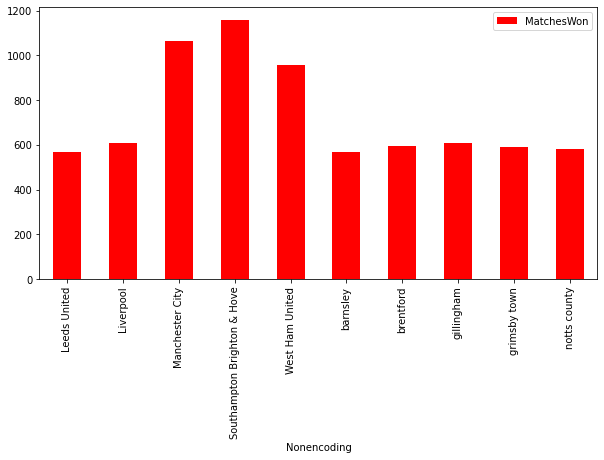

<Figure size 720x3600 with 0 Axes>

In [183]:
from cycler import cycler
df_top = dfx.nlargest(10, 'MatchesWon')
x = df_top[['MatchesWon']].groupby(['Nonencoding']).sum()
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b','c'])))
ax = x.plot(kind='bar', legend = True,figsize=(10,5))
plt.figure(figsize=(10,50))
plt.show()

# Most matches draw by the team

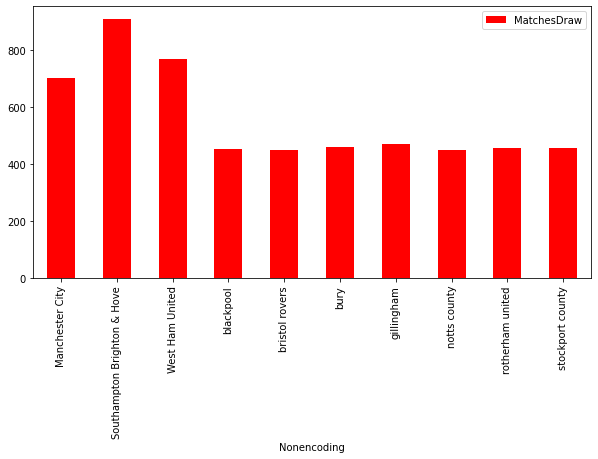

In [184]:
from cycler import cycler
df_top = dfx.nlargest(10, 'MatchesDraw')
x = df_top[['MatchesDraw']].groupby(['Nonencoding']).sum()

plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b','c'])))
ax = x.plot(kind='bar', legend = True,figsize=(10,5))

plt.show()

# Most matches lost by the team

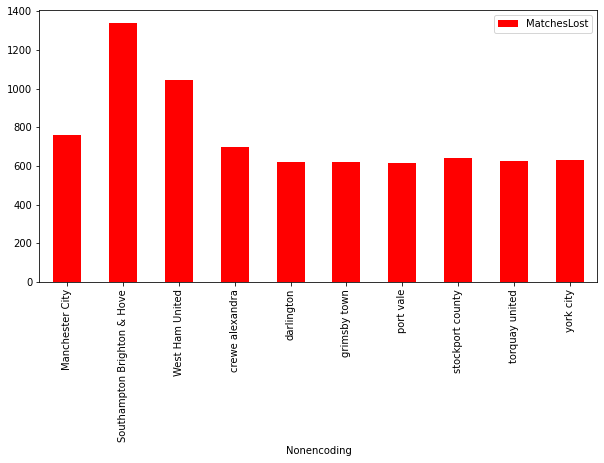

In [185]:
from cycler import cycler
df_top = dfx.nlargest(10, 'MatchesLost')
x = df_top[['MatchesLost']].groupby(['Nonencoding']).sum()

plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b','c'])))
ax = x.plot(kind='bar', legend = True,figsize=(10,5))

plt.show()

# Most numbfer of goals by the team

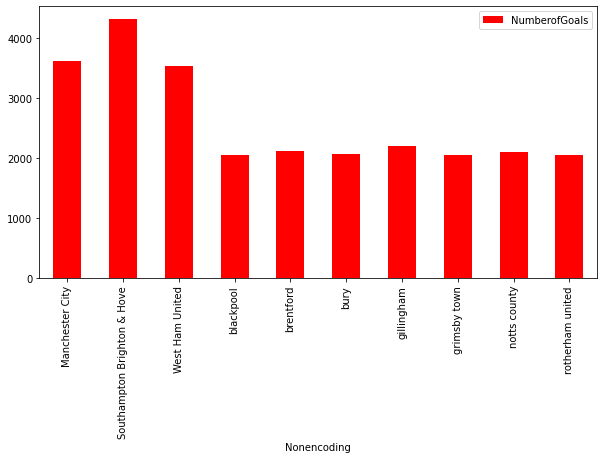

In [186]:
from cycler import cycler
df_top = dfx.nlargest(10, 'NumberofGoals')
x = df_top[['NumberofGoals']].groupby(['Nonencoding']).sum()

plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b','c'])))
ax = x.plot(kind='bar', legend = True,figsize=(10,5))

plt.show()

# Most number of lost goals by the team

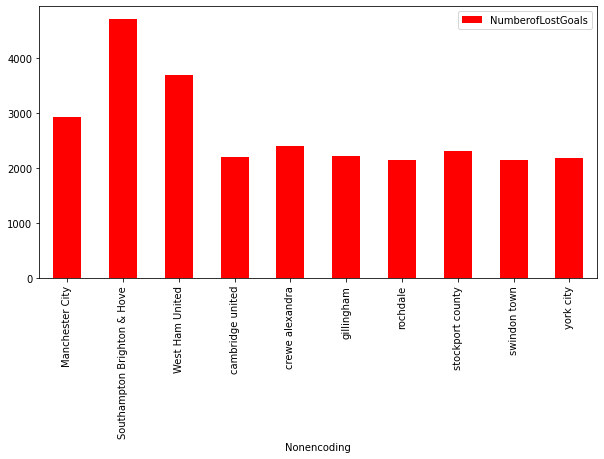

In [187]:
from cycler import cycler
df_top = dfx.nlargest(10, 'NumberofLostGoals')
x = df_top[['NumberofLostGoals']].groupby(['Nonencoding']).sum()

plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b','c'])))
ax = x.plot(kind='bar', legend = True,figsize=(10,5))

plt.show()

# Most total points the team

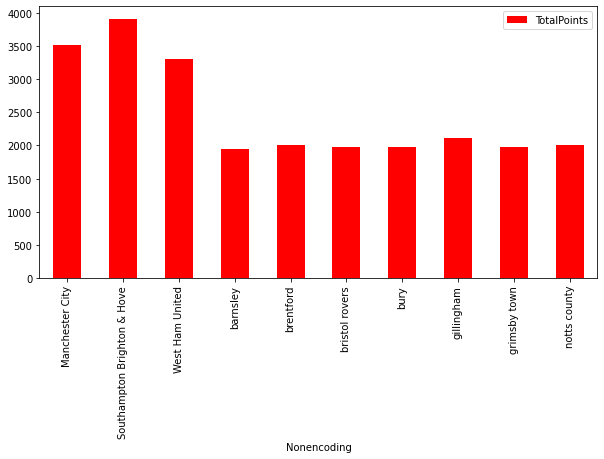

In [188]:
from cycler import cycler
df_top = dfx.nlargest(10, 'TotalPoints')
x = df_top[['TotalPoints']].groupby(['Nonencoding']).sum()

plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b','c'])))
ax = x.plot(kind='bar', legend = True, figsize=(10,5))

plt.show()

# Splitting the data to make it the test and train

In [189]:
X =df[['TotalPoints']]
y = df["Team_Name"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
df

,Team_Name,NumberofMatches,MatchesWon,MatchesDraw,MatchesLost,NumberofGoals,NumberofLostGoals,TotalPoints,Rank,Nonencoding
0,7,42,29,7,6,71,29,65,1,Arsenal
1,12,42,27,10,5,72,30,64,2,Leeds United
2,18,42,19,14,9,54,33,52,3,Tottenham Hotspur
3,20,42,22,8,12,64,54,52,4,Wolverhampton Wanderers
4,14,42,17,17,8,42,24,51,5,Liverpool
...,...,...,...,...,...,...,...,...,...,...
3093,93,46,11,11,24,52,78,44,3,northwich victoria
3094,24,46,9,14,23,56,82,41,4,altrincham
3095,64,46,10,9,27,48,86,39,5,farsley celtic
3096,118,46,5,10,31,42,99,25,6,stafford rangers


# Build Machine Learning Model (Decision Tree Classifier)

In [190]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

# Caclulate the test accuracy score and classify report




In [191]:
test_accuracy = get_accuracy(dt, X_test, y_test)
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.9951612903225806


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


[0.99354839 0.98870968 0.98870968 0.99353796 0.99030695]


Text(0.5, 1.0, 'Validation Accuracy')

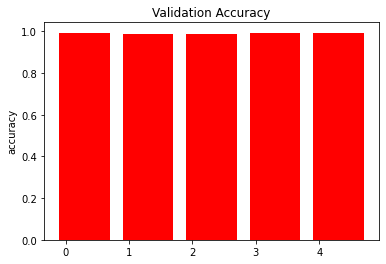

In [192]:
cv = 5
n_jobs = 4
valid_accuracy = get_validation_score(cv, n_jobs)

index = np.arange(5) + 0.3
print(valid_accuracy)
plt.bar(index, valid_accuracy)
plt.ylabel("accuracy")
plt.title('Validation Accuracy')

Is there a connection between winning the first round in a season to finish the season in a higher place in the table?

In [205]:
FirstWin_Rank1 = df.loc[df.Rank == 1, 'FirstWin']
FirstWin_Rank1.sum()/len(FirstWin_Rank1)

0.6405228758169934

It shows that 64% of the teams which ranked first win the first round. So we say theat there are some relation between winning the first round and the higher place in the season with 64%.